In [1]:
# pip install pandas

In [69]:
print("Libraries loading")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

print("All the libraries loadded successfully")








Libraries loading
All the libraries loadded successfully


In [70]:
df=pd.read_csv("D:/swapna python/adult.csv")
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,?,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [71]:
df.shape

(32561, 15)

# EDA (Exploratory data analysis)

In [72]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Here all the column values are not in same data type.so we have to make them all should be in same dtype.

In [74]:
#finding unique values in each variable
for i in df.columns:
    print(df[i].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
['?' 'Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wif

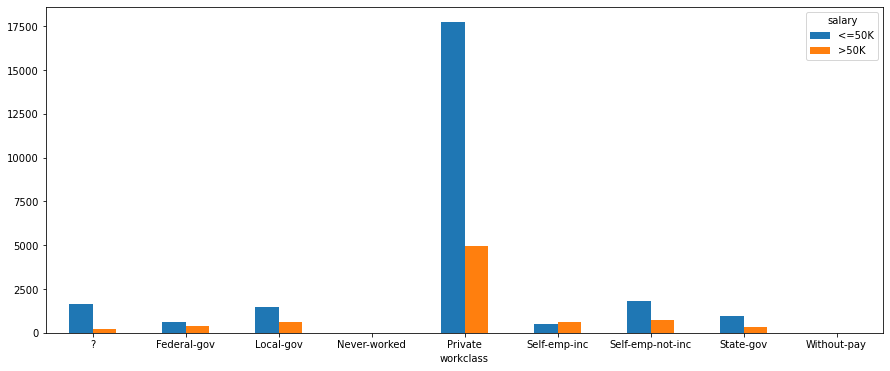

In [75]:
#Analysing the Salary vs workclass with bar plot
crosstb = pd.crosstab(df.workclass, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

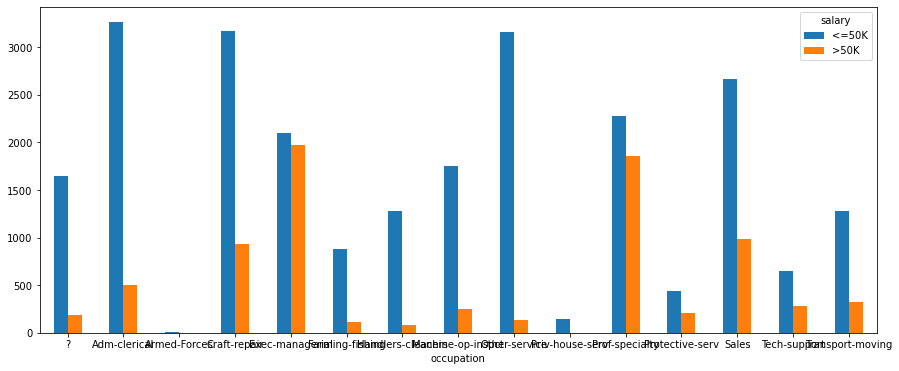

In [76]:
#Analysing the Salary vs occupation with bar plot
crosstb = pd.crosstab(df.occupation, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

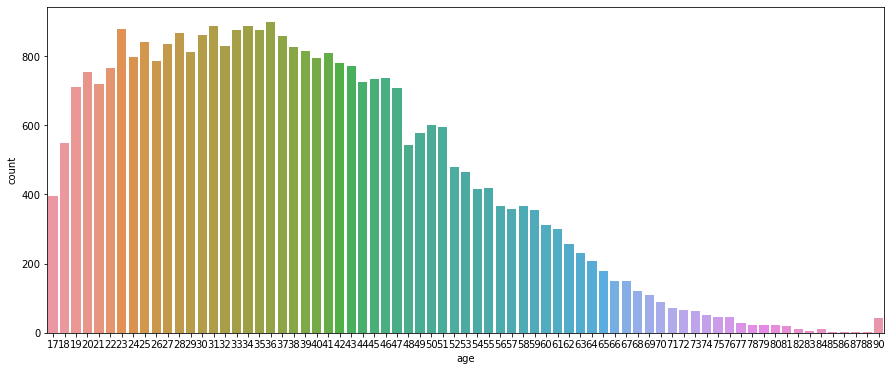

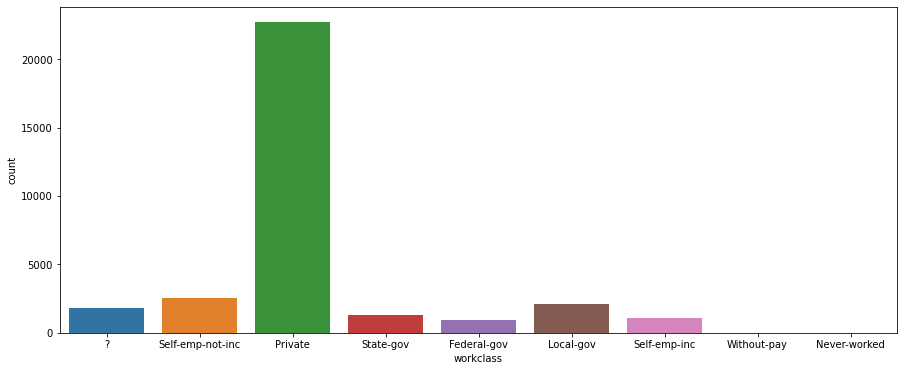

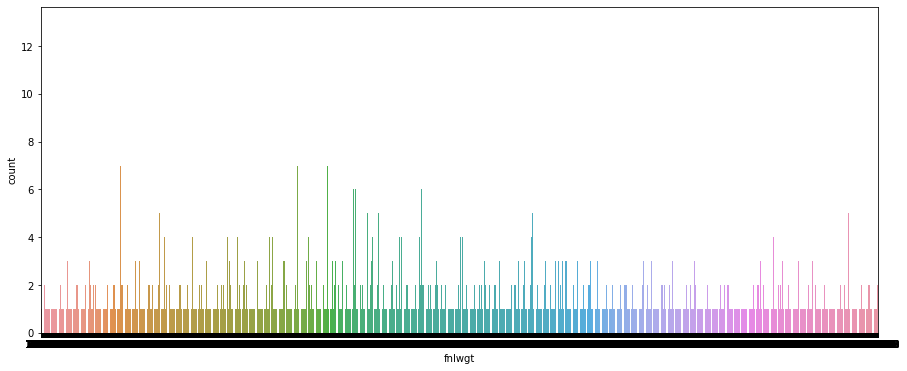

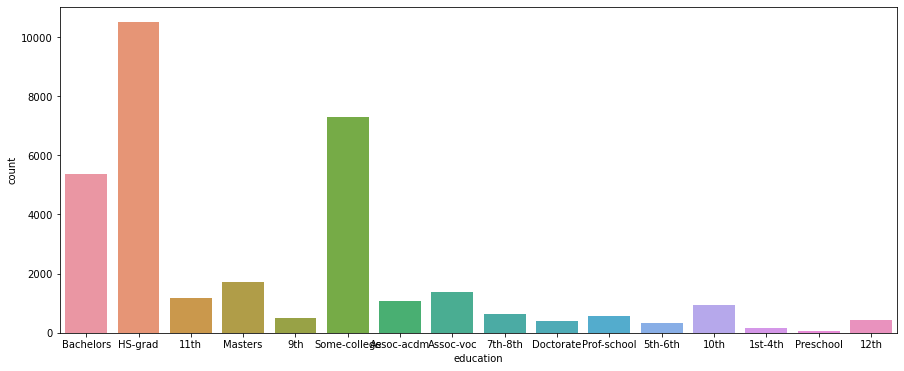

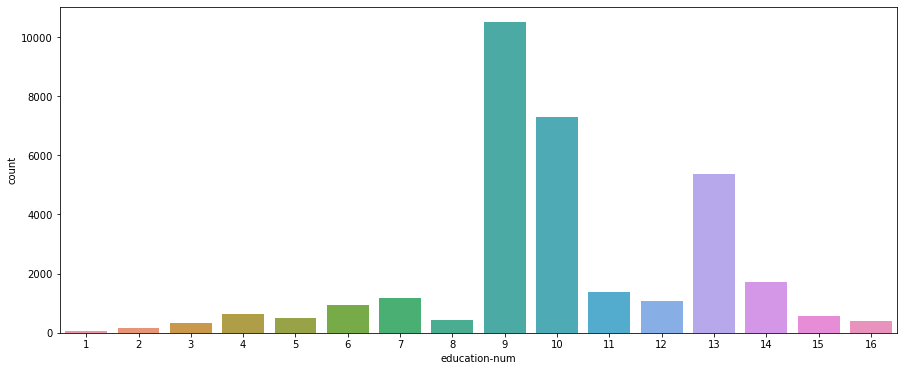

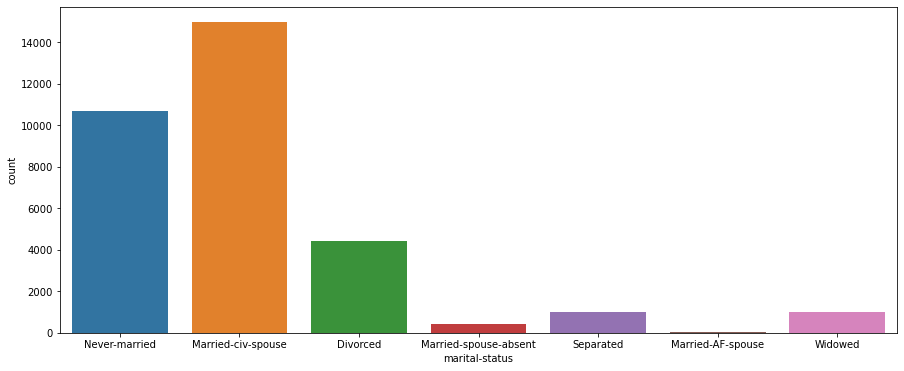

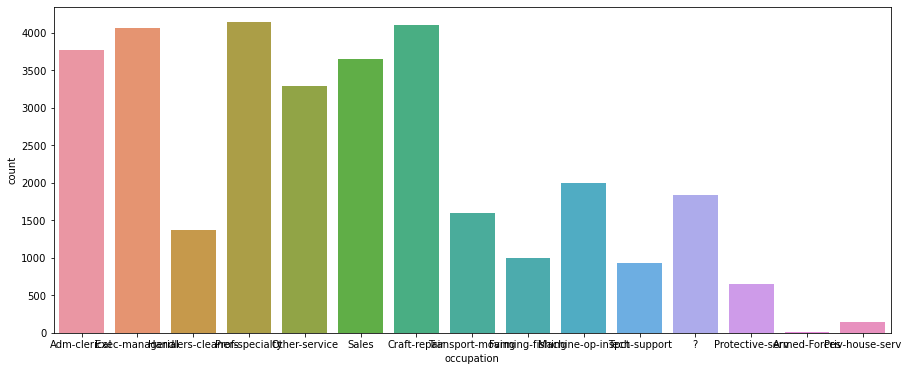

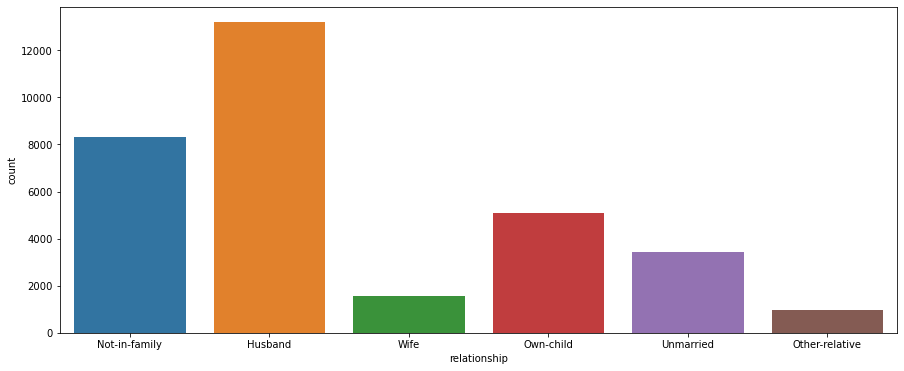

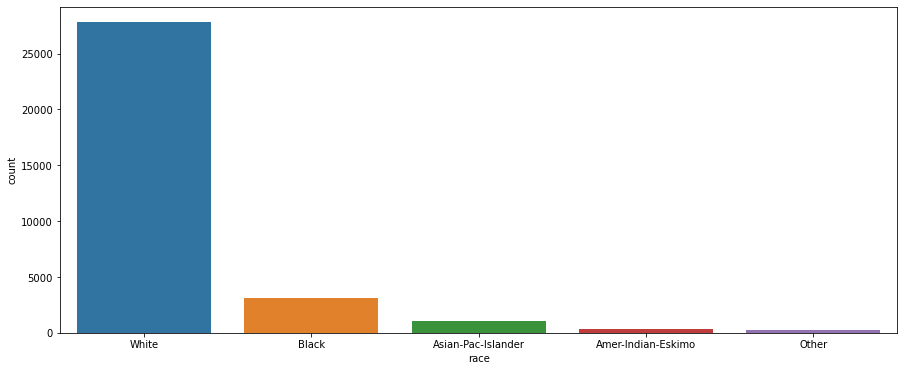

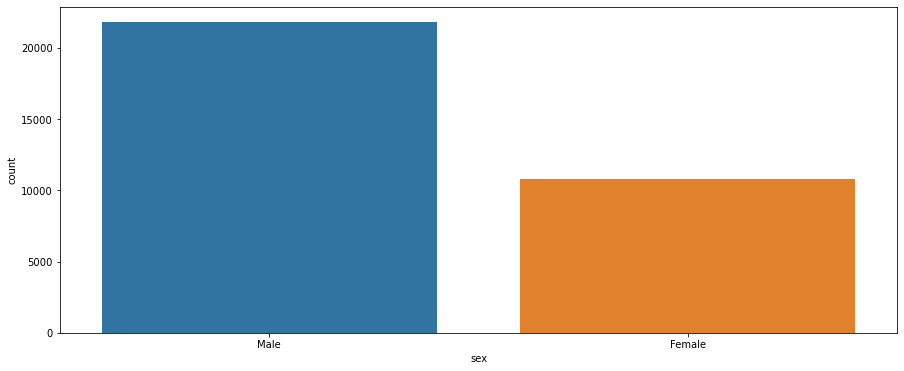

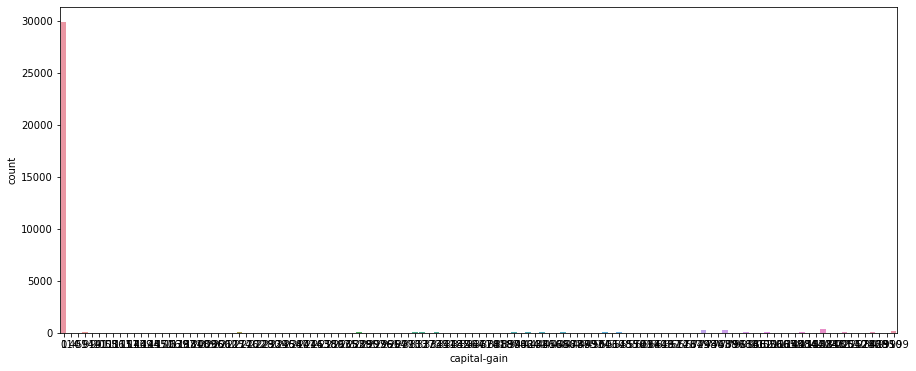

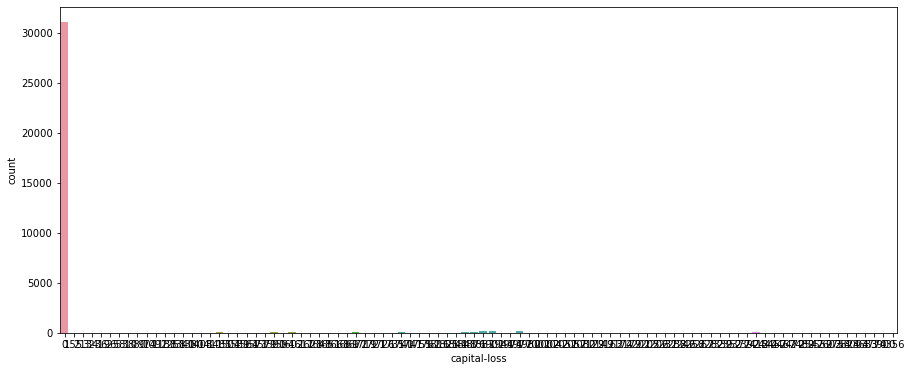

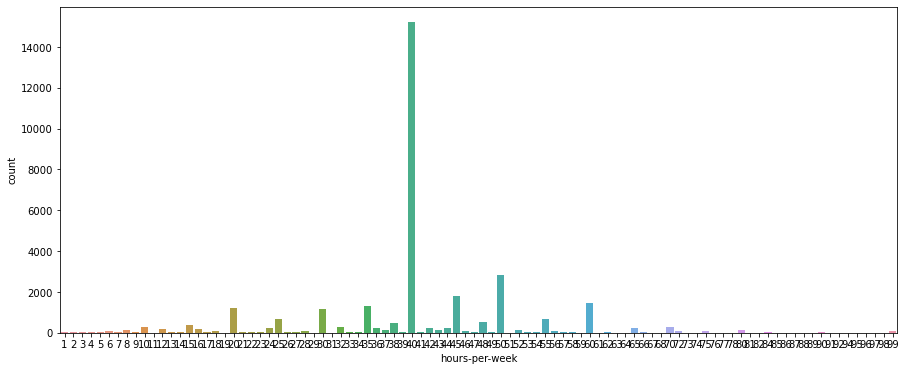

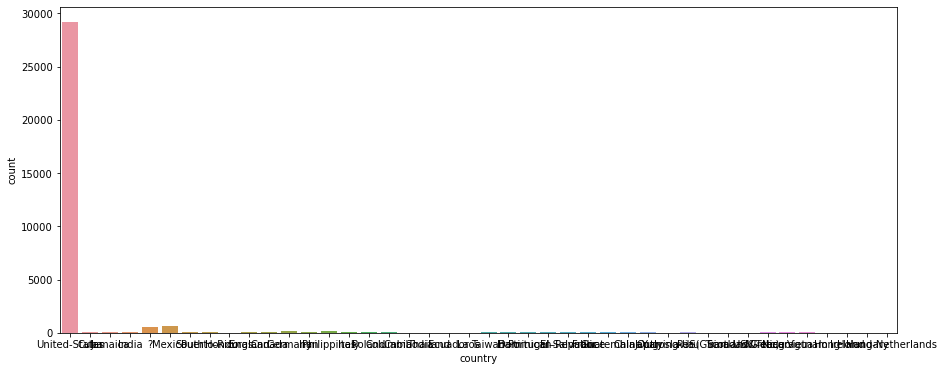

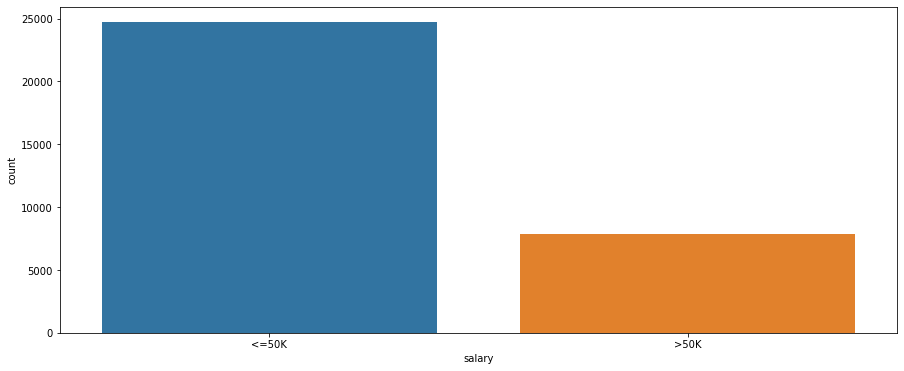

In [77]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    #sns.countplot(data=df['workclass'], x=df['workclass'], element="bars",kde=True, color="#1dc2a6")
    sns.countplot(x=df[i])

In [78]:

# 1.'age' column is having skewness. and outliers too.
# 2.in 'workclass' column 'private' values are more.
# 3.In 'education' column hs-grad,some-college,bachelors values are having more.
# 4.In 'education-num' column we observe little skewness.
# 5.In 'marital-status' more values count married-civ-spouse,never-married,divorced.
# 6.in 'occupation' column we observe skewness.
# 7.In 'relationship' husband and not-in-family count is more.
# 8.In 'race' column white count is more.
# 9.In 'sex' column male count is more.
# 10.in 'capital-gain' we observe outliers.
# 11.In 'capital-loss' we observe outliers.
# 12.'hours-per-week' 40 values are more.
# 13.'country' we observe united-states are having more values.
# 14.'salary' <=50k


<!-- 1.'age' column is having skewness. and outliers too.
2.in 'workclass' column 'private' values are more.
3.In 'education' column hs-grad,some-college,bachelors values are having more.
4.In 'education-num' column we observe little skewness.
5.In 'marital-status' more values count married-civ-spouse,never-married,divorced.
6.in 'occupation' column we observe skewness.
7.In 'relationship' husband and not-in-family count is more.
8.In 'race' column white count is more.
9.In 'sex' column male count is more.
10.in 'capital-gain' we observe outliers.
11.In 'capital-loss' we observe outliers.
12.'hours-per-week' 40 values are more.
13.'country' we observe united-states are having more values.
14.'salary' <=50k
 -->

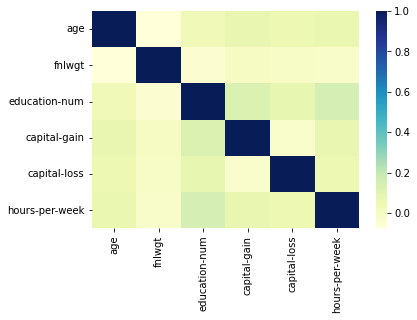

In [79]:
dataplot=sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()

In [80]:
for i in df.columns:
    print(df[i].value_counts())


36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1837
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
9     10501
10     7291

In [81]:
#here we can say that there are some values with '?' in some features.
#we are trying show them as null values.

In [82]:
df["workclass"]=df["workclass"].map(lambda x:np.nan if x=='?' else x)

In [83]:
df["occupation"]=df["occupation"].map(lambda x:np.nan if x=='?' else x)

In [84]:
df["country"]=df["country"].map(lambda x:np.nan if x=='?' else x)

In [85]:
df.isnull().sum()

age                  0
workclass         1837
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

we have nan values in 3 features.for country feature most of the values are 'us' only. so these null values are not effect the data anymore.thats why we are not filling these null vaues for "country" feature.


# FEATURE ENGINEERING

filling the nan values of "occupation" and "workclass" features with mode values respectively 

In [86]:
df["occupation"] = df["occupation"].fillna(df["occupation"].mode()[0])

In [87]:
df["workclass"] = df["workclass"].fillna(df["workclass"].mode()[0])


In [88]:
df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
country           583
salary              0
dtype: int64

In [89]:
df['education'].replace(['Preschool','1st-4th','5th-6th', '7th-8th','9th','10th','11th','12th','HS-grad','Some-college','Assoc-voc','Assoc-acdm','Bachelors','Masters','Prof-school','Doctorate'],
                        [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], inplace=True)

In [90]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,Private,77516,13,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [91]:
#here 'education' and 'education-num' both are representing same thing.so we can drop any one of them.

In [92]:
df.drop("education",inplace=True,axis=1)

In [93]:
df['marital-status'].replace(['Married-civ-spouse','Never-married','Divorced','Separated','Widowed','Married-spouse-absent','Married-AF-spouse'],
                        [0, 1,2,3,4,5,6], inplace=True)

In [94]:
df['relationship'].replace(['Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative'],
                        [0, 1,2,3,4,5], inplace=True)

In [95]:
df['race'].replace(['White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other'],
                        [0, 1,2,3,4], inplace=True)

In [96]:
df['sex'].replace(['Male','Female'],[0,1],inplace=True)

In [97]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,Private,77516,13,1,Adm-clerical,1,0,0,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,0,Exec-managerial,0,0,0,0,0,13,United-States,<=50K
2,38,Private,215646,9,2,Handlers-cleaners,1,0,0,0,0,40,United-States,<=50K
3,53,Private,234721,7,0,Handlers-cleaners,0,1,0,0,0,40,United-States,<=50K
4,28,Private,338409,13,0,Prof-specialty,4,1,1,0,0,40,Cuba,<=50K


##converting categorical features into numerical by using one hot encoding

In [98]:
data=pd.get_dummies(df,columns=["workclass","occupation","country"],drop_first=True)

In [99]:
data

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,39,77516,13,1,1,0,0,2174,0,40,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,0,0,0,13,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,2,1,0,0,0,0,40,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,1,0,0,0,40,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,4,1,1,0,0,40,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,4,0,1,0,0,38,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,0,0,0,0,40,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,4,3,0,1,0,0,40,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,1,2,0,0,0,0,20,...,0,0,0,0,0,0,0,1,0,0


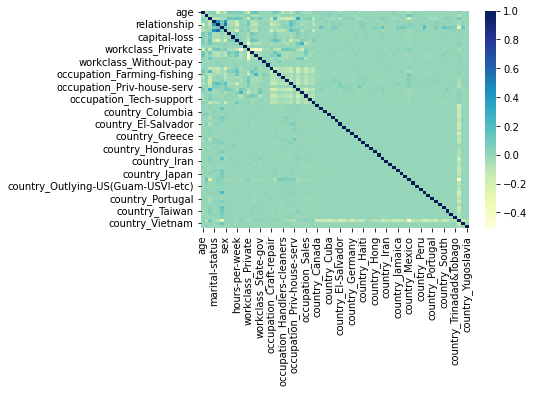

In [100]:
import seaborn as sns

dataplot=sns.heatmap(data.corr(),cmap="YlGnBu")
plt.show()

In [101]:
#by seeing this ghaph we can say that there are no correlated variable in our data.

In [102]:
#import matplotlib.pyplot as plt
#x=df['marital-status']
#y=df['salary']
#fig, ax = plt.subplots()
#ax.scatter(x, y, alpha=0.5, marker=r'$\clubsuit$',c="green")

#plt.show()

In [103]:
data.head()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,39,77516,13,1,1,0,0,2174,0,40,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,0,0,0,13,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,2,1,0,0,0,0,40,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,1,0,0,0,40,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,4,1,1,0,0,40,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

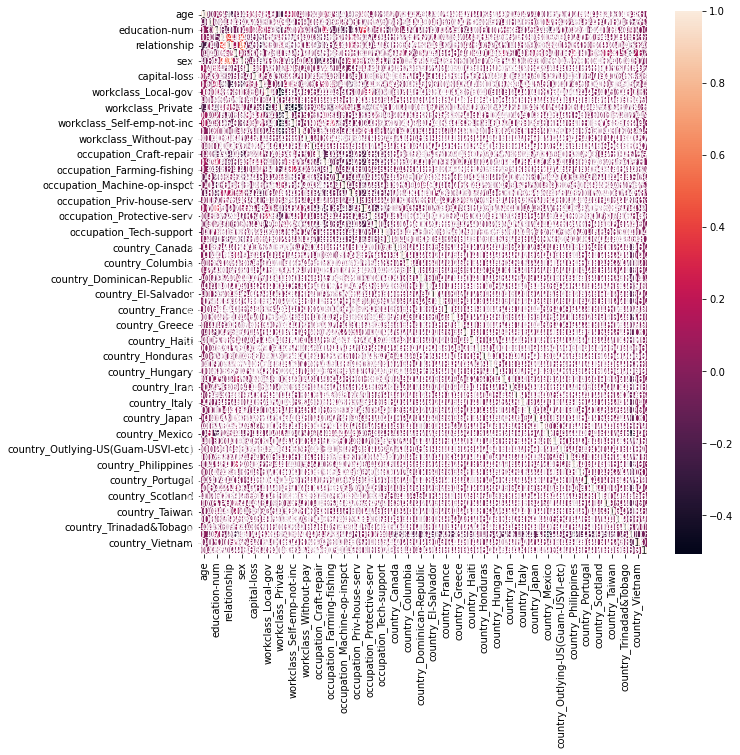

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cor=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

In [105]:
  
X = data.drop(['salary'],axis=1).values
y = data['salary'].values


In [106]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=1)

In [107]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
 
predicted_value = model.predict(X_test)
print(predicted_value)
 


['<=50K' '<=50K' '>50K' ... '>50K' '<=50K' '<=50K']


In [108]:
# Evaluating the results
accuracy = accuracy_score(y_test,predicted_value)
report = classification_report(predicted_value, y_test)
cm = confusion_matrix(y_test, predicted_value)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)


Classification report:
Accuracy:  0.8136963865288156
              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      7406
        >50K       0.62      0.58      0.60      2363

    accuracy                           0.81      9769
   macro avg       0.75      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769

Confusion matrix:
[[6568  982]
 [ 838 1381]]
